# Healthcare Dataset - Logistic Regression
## Abhi Jouhal
## ID - 500187542

### Importing the necessary libraries 

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importing the dataset

In [30]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv', na_values = ['', 'NaN', 'MOD'])

dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Dropping the ID column since it is useless

In [31]:
dataset = dataset.drop('id', axis=1)

### Checking the data types of the features

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Plotting all the columns as histograms to take a look at the data

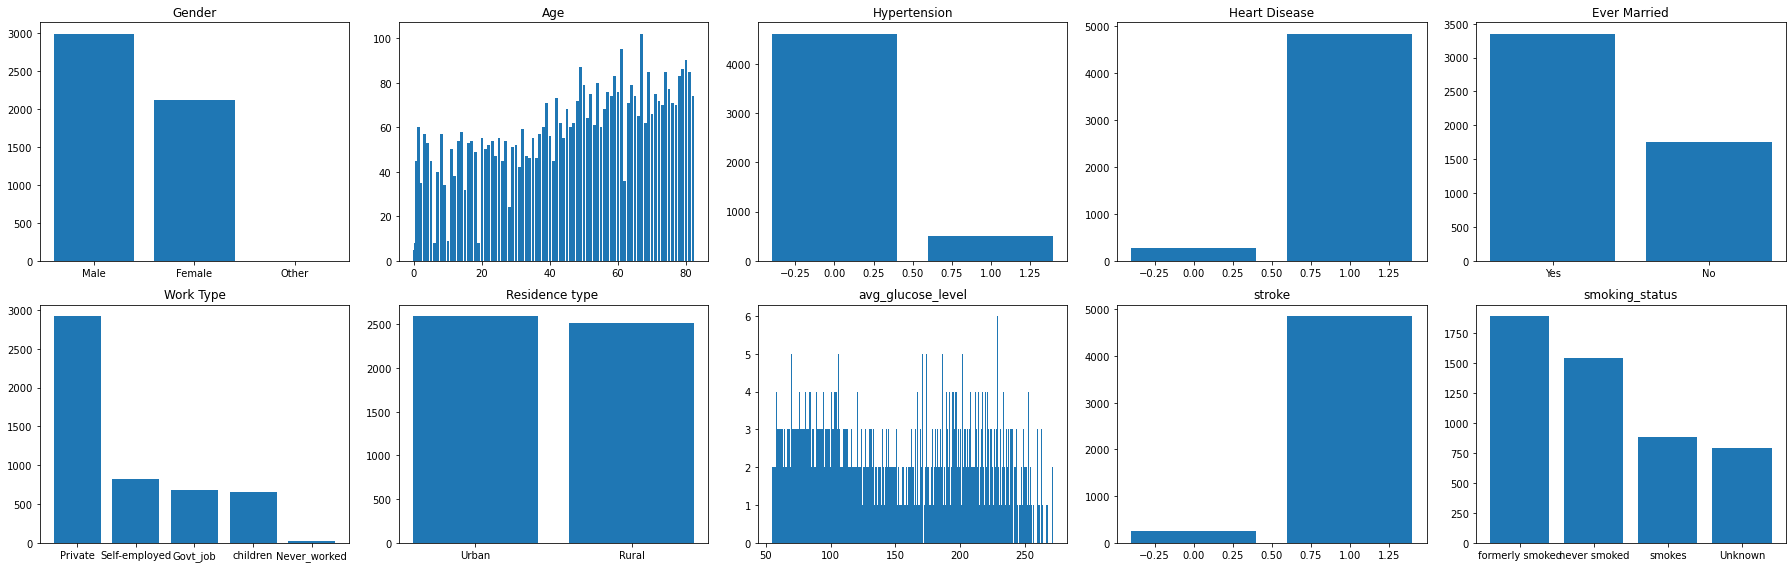

In [33]:
fig, axs = plt.subplots(2, 5)

axs[0, 0].bar(dataset.gender.unique(),  dataset.gender.value_counts())
axs[0, 0].set_title('Gender')

axs[0, 1].bar(dataset.age.unique(),  dataset.age.value_counts())
axs[0, 1].set_title('Age')

axs[0, 2].bar(dataset.hypertension.unique(),  dataset.hypertension.value_counts())
axs[0, 2].set_title('Hypertension')

axs[0, 3].bar(dataset.heart_disease.unique(),  dataset.heart_disease.value_counts())
axs[0, 3].set_title('Heart Disease')

axs[0, 4].bar(dataset.ever_married.unique(),  dataset.ever_married.value_counts())
axs[0, 4].set_title('Ever Married')

axs[1, 0].bar(dataset.work_type.unique(),  dataset.work_type.value_counts())
axs[1, 0].set_title('Work Type')

axs[1, 1].bar(dataset.Residence_type.unique(),  dataset.Residence_type.value_counts())
axs[1, 1].set_title('Residence type ')

axs[1, 2].bar(dataset.avg_glucose_level.unique(),  dataset.avg_glucose_level.value_counts())
axs[1, 2].set_title('avg_glucose_level')

axs[1, 3].bar(dataset.stroke.unique(),  dataset.stroke.value_counts())
axs[1, 3].set_title('stroke')

axs[1, 4].bar(dataset.smoking_status.unique(),  dataset.smoking_status.value_counts())
axs[1, 4].set_title('smoking_status')

fig.set_figheight(8)
fig.set_figwidth(25)
fig.tight_layout()
fig.show()

### Checking the imbalance in the 'stroke' column

In [34]:
dataset['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

### Using the sklearn resample to solve our imbalance issue

In [35]:
from sklearn.utils import resample

dataset_maj = dataset[dataset.stroke==0]
dataset_min = dataset[dataset.stroke==1]

dataset_min_up = resample(dataset_min,
                         replace=True,
                         n_samples=4861,
                         random_state=123)

dataset_up = pd.concat([dataset_maj, dataset_min_up])

dataset_up.stroke.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [36]:
dataset_up

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
149,Female,70.0,0,1,Yes,Private,Rural,239.07,26.1,never smoked,1
188,Male,82.0,0,0,Yes,Private,Rural,86.62,29.5,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1
238,Female,51.0,1,0,Yes,Private,Urban,88.20,28.4,never smoked,1


### Checking for missing values

In [37]:
for i in dataset_up.columns:
    print (i + ": "+str(sum(dataset_up[i].isnull()))+" missing values")

gender: 0 missing values
age: 0 missing values
hypertension: 0 missing values
heart_disease: 0 missing values
ever_married: 0 missing values
work_type: 0 missing values
Residence_type: 0 missing values
avg_glucose_level: 0 missing values
bmi: 903 missing values
smoking_status: 0 missing values
stroke: 0 missing values


### Since the missing values are small in proportion to the whole data, we can drop those rows.

In [38]:
dataset_up = dataset_up.dropna(axis=1, how='any')

### Checking the central tendency and other statistics 

In [39]:
display(np.round(dataset_up.describe()))

,age,hypertension,heart_disease,avg_glucose_level,stroke
count,9722.0,9722.0,9722.0,9722.0,9722.0
mean,55.0,0.0,0.0,118.0,0.0
std,22.0,0.0,0.0,55.0,1.0
min,0.0,0.0,0.0,55.0,0.0
25%,41.0,0.0,0.0,78.0,0.0
50%,59.0,0.0,0.0,97.0,0.0
75%,74.0,0.0,0.0,145.0,1.0
max,82.0,1.0,1.0,272.0,1.0


### We use LabelEncoder to encode the binary features

In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset_up['ever_married'] = encoder.fit_transform(dataset_up['ever_married'].astype(str))
dataset_up['Residence_type'] = encoder.fit_transform(dataset_up['Residence_type'].astype(str))
dataset_up['gender'] = encoder.fit_transform(dataset_up['gender'].astype(str))

### For multi-variate features, we use the get_dummies method from pandas to perform one-hot encoding.

In [41]:
'''from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(dataset['work_type'].values.reshape(-1,1))
enc.transform(dataset['work_type'].values.reshape(-1,1))'''


temp_df = dataset_up['work_type']
temp_df = pd.get_dummies(temp_df)
dataset_up.drop('work_type', axis = 1, inplace = True)
dataset_0 = pd.concat([dataset_up, temp_df], axis = 1, sort=False)

temp_df = dataset_0['smoking_status']
temp_df = pd.get_dummies(temp_df)
dataset_0.drop('smoking_status', axis = 1, inplace = True)
dataset_1 = pd.concat([dataset_0, temp_df], axis = 1, sort=False)

dataset_1

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
249,1,3.0,0,0,0,0,95.12,0,0,0,0,0,1,1,0,0,0
250,1,58.0,1,0,1,1,87.96,0,0,0,1,0,0,0,0,1,0
251,0,8.0,0,0,0,1,110.89,0,0,0,1,0,0,1,0,0,0
252,0,70.0,0,0,1,0,69.04,0,0,0,1,0,0,0,1,0,0
253,1,14.0,0,0,0,0,161.28,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,70.0,0,1,1,0,239.07,1,0,0,1,0,0,0,0,1,0
188,1,82.0,0,0,1,0,86.62,1,0,0,1,0,0,0,1,0,0
247,1,71.0,1,0,1,0,87.80,1,0,0,0,1,0,1,0,0,0
238,0,51.0,1,0,1,1,88.20,1,0,0,1,0,0,0,0,1,0


### Test and train split

In [42]:
from sklearn.model_selection import train_test_split

target = dataset_1['stroke']
data = dataset_1.drop(columns=['stroke'])

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30)

### Applying a logistic regression model for classification

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# model training
lr.fit(X_train, y_train)

LogisticRegression()

### Predicting the values with this model

In [44]:
pred = lr.predict(X_test)
pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

### Getting the accuracy score of the logistic model

In [45]:
# accuracy score of the model
score = lr.score(X_test, y_test)
print(score)

0.7672266026739801


### Getting the classification report metrics like precision, recall and f1-score

In [46]:
from sklearn.metrics import classification_report

matrix = classification_report(y_test,pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.80      0.77      1451
           0       0.79      0.73      0.76      1466

    accuracy                           0.77      2917
   macro avg       0.77      0.77      0.77      2917
weighted avg       0.77      0.77      0.77      2917



### Plotting the confusion matrix

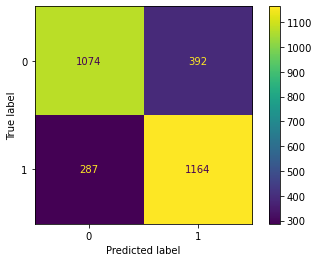

In [47]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test)  
plt.show()

### Training the second model - Decision Tree Clasification

In [48]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

### Predicting the values based on this model

In [49]:
pred_t = clf.predict(X_test)
pred_t

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

### Getting the classification report metrics like precision, recall and f1-score

In [50]:
from sklearn.metrics import classification_report

matrix = classification_report(y_test,pred_t,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.95      1.00      0.97      1451
           0       1.00      0.94      0.97      1466

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



### Plotting the confusion matrix

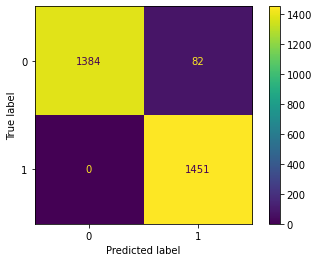

In [51]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

### Checking the p-value for the null-hypothesis mentioned below

In [52]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=LogisticRegression(), estimator2=tree.DecisionTreeClassifier(), X=data, y=target, 
                          scoring='accuracy', random_seed=1)

print('P-value:', p)
print('t:', t)

P-value: 3.551078213123654e-06
t: -22.064116070185225
